## Final report guidelines

### 1) Summary of problem statement, data and findings

Every good abstract describes succinctly what was intended at the outset, and summarizes findings and implications.

### Problem Statement

The European MNC bank faces a significant challenge with customer churn across its branches in France, Germany, and Spain. High churn rates lead to revenue losses and increased customer acquisition costs. Understanding why customers leave is critical to addressing this issue. Factors such as competition, customer dissatisfaction, changing banking needs, and poor service could contribute to churn. The bank seeks to predict which customers are likely to leave to take proactive steps, such as offering personalized services, improving engagement, or addressing pain points. By reducing churn, the bank aims to improve customer retention and strengthen its market position.

### Dataset and domain
* The Dataset belongs to Banking domain. It contains 10000 rows and 18 columns

### Data Dictionary 

| # | FIELDS | DESCRIPTION
| -- | ------------ | --------------------------------------- |
| 1 | RowNumber  | Corresponds to the record (row) number  | 
| 2 | CustomerId  | ID of the customer that uniquely identifies a customer  | 
| 3 | Surname  | Surname of the customer  | 
| 4 | CreditScore  | Credit Score of the Customer  | 
| 5 | Geography  | Customer’s Location  | 
| 6 | Gender  | Gender of the Customer  | 
| 7 | Age  | Age of the Customer  | 
| 8 | Tenure  | Number of years that the customer has been a client of the bank  | 
| 9 | Balance  | Balance of the Customer  | 
| 10 | NumOfProducts  | Number of products that the customer has purchased through the bank  | 
| 11 | HasCrCard  | An indicator denoting whether the customer has a credit card  | 
| 12 | IsActiveMember  | An indicator denoting  whether the customer is Active  | 
| 13 | EstimatedSalary  | Estimated Salary of the Customer  |  
| 14 | Exited  | An indicator denoting  whether or not the customer left the bank. ( Target variable )  | 
| 15 | Complain  | An indicator denoting  whether the customer has complaint or not  | 
| 16 | Satisfaction Score  | Score provided by the customer for their complaint resolution.  | 
| 17 | Card Type  | Type of card the customer holds | 
| 18 | Points Earned  |Points earned by the customer for using credit card  | 


### Findings and implications

Through the use of logistic regression, we have established a strong baseline model that offers reliable predictions on customer churn risk. As per the logistic regression model, our base line model, we infer the following:

**Recall for the minority class** for the training dataset and test dataset: 100% and 100%. 
Using 10-fold cross validation: 99.8% with standard deviation of 0.003

**Pseudo R square (McFadden R square):** 97.93%

**Significant Independent variables:** 
* Complain (Odds ratio:567302)
* Age (Odds ratio: 3.040042)
* IsActiveMember (Odds ratio: 0.214312)

The target variable. **Exited** are infliuenced by the two independent variables. Complian and Age.  

### 2) Overview of the final process

Briefly describe your problem solving methodology. Include information about the salient features of your data, data pre-processing steps, the algorithms you used, and how you combined techniques.

### 3) Step-by-step walk through of the solution

Describe the steps you took to solve the problem. What did you find at each stage, and how did it inform the next steps? Build up to the final solution.

In [1]:
import  os
import  warnings
warnings.filterwarnings("ignore")
folder   = r'H:\DSE-FT-C-May24-G5\Final'
os.chdir(folder)
os.getcwd()

'H:\\DSE-FT-C-May24-G5\\Final'

### Measure execution time

In [2]:
from   datetime import datetime 
import datetime as dt

start_time = datetime.now()

### Import Libraries

In [3]:
import numpy                    as     np
import seaborn                  as     sns
import matplotlib.pyplot        as     plt
import plotly.express           as     plx
import pandas                   as     pd
import statistics
import statsmodels.api          as     sm
import sklearn.metrics          as     metrics
from   sklearn.metrics          import recall_score
import warnings
warnings.filterwarnings("ignore")

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

from scipy import stats
from sklearn.model_selection    import train_test_split,cross_val_score,cross_val_predict
from sklearn.model_selection    import  StratifiedKFold
from sklearn.linear_model       import LogisticRegression
from sklearn.preprocessing      import StandardScaler,LabelEncoder
from sklearn.metrics            import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,f1_score,classification_report

from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.tree                          import DecisionTreeClassifier,plot_tree
from statsmodels.stats.stattools           import durbin_watson
from sklearn.preprocessing                 import FunctionTransformer

In [4]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [5]:
from   sklearn.feature_selection   import  RFECV
from   sklearn.feature_selection   import  RFE
from   sklearn                     import  metrics
from   sklearn.pipeline            import  Pipeline
from   sklearn                     import  preprocessing   
from   sklearn.model_selection     import  cross_val_score
from   sklearn.model_selection     import  RepeatedStratifiedKFold
from   sklearn.ensemble            import  RandomForestClassifier

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore")
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [7]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [8]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [9]:
def calculate_VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    #calculate VIF for each explanatory variable
    vif             =  pd.DataFrame()
    vif['VIF']      =  [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] =  X.columns

    #view VIF for each explanatory variable 
    return vif

In [10]:
 def remove_high_vif(X, thresh = 5):
    from statsmodels.stats.outliers_influence import variance_inflation_factor   
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [11]:
def  report_null(df):
    counts_list          =  list(zip(df.isnull().sum(),round((df.isnull().sum() * 100) / df.shape[0],2)))
    cols                 =  df.columns
    c                    =  df.isnull().sum()
    p                    =  round((df.isnull().sum() * 100) / df.shape[0],2)
    count_df             =  pd.DataFrame({'Column' : cols, 'NA Count' : c, 'NA Percentage' : p })
    filtered_df          =  count_df[(count_df['NA Count'] > 0)]
    return filtered_df

In [12]:
def identify_outliers(df, var):
    # Interquartile Range (IQR)

    # Calculate the upper and lower limits
    Q1                     =    df[var].quantile(0.25)
    Q3                     =    df[var].quantile(0.75)
    IQR                    =    Q3 - Q1  
    low                    =    Q1 - (1.5 * IQR)
    
    lower                  =    abs(Q1 - 1.5 * IQR)
    upper                  =    abs(Q3 + (1.5 * IQR))
    outlier_upper          =    df[df[var] > upper].count()[1]
    outlier_lower          =    df[df[var] < low].count()[1]
    
    m                      =    np.min(df[var])
    mX                     =    np.max(df[var])
    Zero_l                 =    df.loc[df[var]==0,var].sum()
    
    print("\nFeature :{} Lower_quartile: {} ,Upper_quartile: {} ".format(var,lower, upper))
    print("\nMax value: {} Minimum value: {}".format(mX, m))
    print("\nGreater than UpperIQR : {}, Less than lower_IQR : {} ,  zero_count:  {}".format(outlier_upper,outlier_lower,Zero_l))
    
    outliers_present       =   outlier_upper > 0 or outlier_lower > 0
    if outliers_present:
       print("\nVariable {} has outliers".format(var))
    else:
       print("\nVariable {} has NO outliers".format(var))        
   
    sns.boxplot(data=df, x= var)
    titlex = 'Boxplot for ' + var
    plt.title(titlex)
    plt.xticks(rotation = 90)
    plt.show()

In [13]:
def chk_chisq(i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df['Exited'])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
    
    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)    
 
    print("\n{}".format(txt)) 
    print("\n ChiSq Stat: {0}, P value: {1}".format(res[0], res[1]))

In [14]:
def Shapiro_Wilk(df, col1):
    from scipy.stats import shapiro
    x          =  df[col1]
    stat, p    =  shapiro(x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
     print('{} Probably Gaussian'.format(col1))
    else:
     print('{} Probably not Gaussian'.format(col1))

In [15]:
def pointbiserialr(df, col1, y):
    x   =  df[col1]
    stat, p    =  stats.pointbiserialr(y, x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
     print('{} There is no correlation'.format(col1))
    else:
     print('{} There is a correlation'.format(col1))

## Load the Dataset

In [16]:
df        =  pd.read_csv(r'../Data/Customer-Churn-Records.csv')

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
print("The dataset has ",df.shape[0]," rows and ",df.shape[1]," columns")
df.info()

The dataset has  10000  rows and  18  columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfac

We observe that the ID variables and customer personal details such as RowNumber, CustomerId and Surname etc. will not add value to our analysis and hence we need to remove them for our analysis.

In [19]:
drop_cols   =  ['RowNumber', 'CustomerId','Surname']
df.drop(columns = drop_cols, inplace = True)

In [20]:
df_num = df.select_dtypes(exclude=['string','object'])
print("Number of categorical columns {}".format(df_num.shape[1]))
print("Numeric columns {}".format(df_num.columns))

Number of categorical columns 12
Numeric columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')


The following *Twelve* (12) are categorical variables where each one is a code or an indicator:

1) CreditScore
2) Age
3) Tenure
4) Balance
5) NumOfProducts
6) HasCrCard
7) IsActiveMember
8) EstimatedSalary
9) Exited
10) Complain
11) Satisfaction Score
12) Point Earned

In [21]:
df_cat = df.select_dtypes(exclude = ['float64','int64'])
print("Number of numeric columns {}".format(df_cat.shape[1]))
print("Numeric columns {}".format(df_cat.columns))

Number of numeric columns 3
Numeric columns Index(['Geography', 'Gender', 'Card Type'], dtype='object')


### Variable categorization (count of numeric and categorical)

The following *three* (3) are numeric variables:

1) Geography
2) Gender
3) Card Type

### 2. Overview of the final process

The flow of the solving the problem is as follows, <br>
Understand the dataset,its description and problem statement completely. <br>
Analyse the data with five point summary and gain insights on the numerical and categorical columns. <br>
Employ different visualization technique and understand the patterns better. <br>
Identify and handle missing values, outliers, inconsistencies, and duplicates in your dataset. This step is crucial to ensure data quality and prevent errors in your model. <br>
Transform your data into a suitable format for machine learning algorithms. This might involve normalization, standardization, feature engineering, or handling categorical variables. <br>
Check if there is a presence of multicollinearity in the data.<br>
Check for the outliers in the data and decide on how to treat the outliers.<br>
Perform different statistical analysis for the dependent and independent variables based on the different type of the independent variable.<br>
Data Preprocessing is done next to make the data to be effectively understood and to avoid bais of the algorithm towards one independent features.<br>
Feature Selection is employed next to list out the features that are significant and select those only for effective prediction of the fraud .<br>
After selecting the features , the different models that can be implemented is taken under discussion and base model is constructed .<br>
If there is imbalance in the target variable , nesscessary sampling technique is employed and the different models is analysed based on different metrics such as Recall,precision F1 score , weighted F1 score .<br>
Based on our criticality of type 1 and type 2 errors the metric to be considered is carefully chosen accordingly based on the criticallity of the error and domain expertise.<br>



### Five point summary

In [22]:
df.describe(exclude = "object").T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [23]:
df.describe(include="object").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


In [24]:
df['Exited']    =    df['Exited'].astype('object')
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

### Inference for Categorical Variables:

1) Geography: Most common type is "France", followed by others.

2) Gender: Gender of most of the customers in Male.

3) Card Type: Most of the customers hold the card type, DIAMOND.	


### Overall: Categorical variables exhibit varying levels of cardinality. Some variables like "Geography" and "Gender" have high cardinality. The distribution of customer data across different categories provides insights into customer characteristics.

In [25]:
backup_data=df.copy()

In [26]:
print("The number of duplicated rows is ",df.duplicated().sum())

The number of duplicated rows is  0


### Observation

There are no duplicated rows

### Check for null values

In [27]:
report_null(df)

,Column,NA Count,NA Percentage


## There are no missing values.

## 3. Step-by-step walk through of the solution

In [28]:
num_columns  =  df.describe(exclude = "object").columns

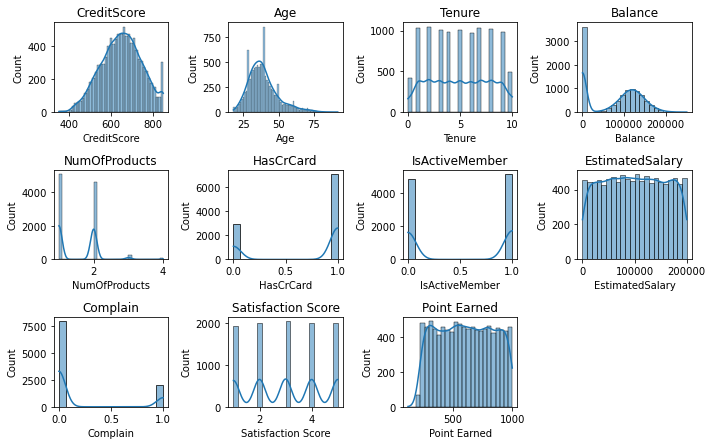

In [29]:
# Univariate Analysis
plt.figure(figsize=(10,12))
t=1
for i in num_columns.to_list():
    plt.subplot(6,4,t)
    sns.histplot(df[i],kde=True)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()
    

## Bivariate Analysis

### A) Categorical variables


In [30]:
cat_columns =  df.describe(include="object").columns

In [31]:
c           =  ['Geography', 'Gender', 'Card Type']

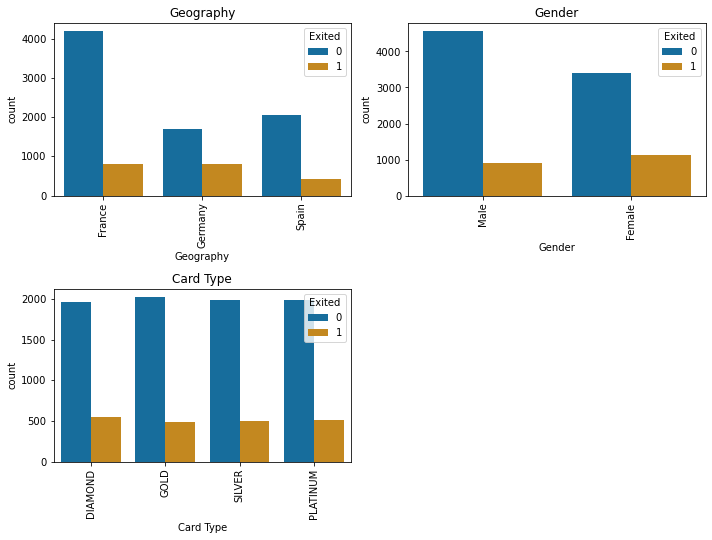

In [32]:
plt.figure(figsize=(10,14))
t=1
for i in c:
    plt.subplot(4,2,t)
    sns.countplot(data=df,x=i,order=df[i].value_counts().index,palette='colorblind', hue = "Exited")
    plt.title(i)
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

### B) Numerical variables

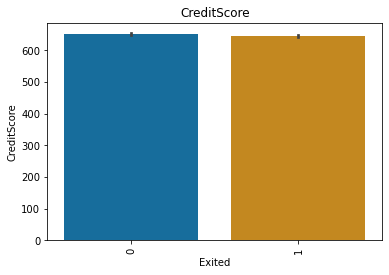

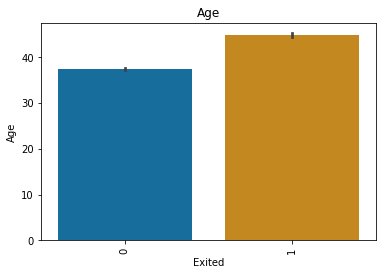

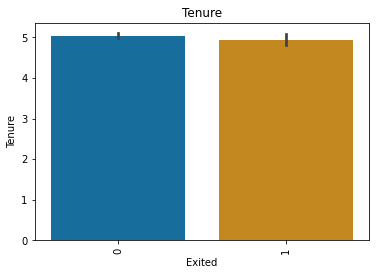

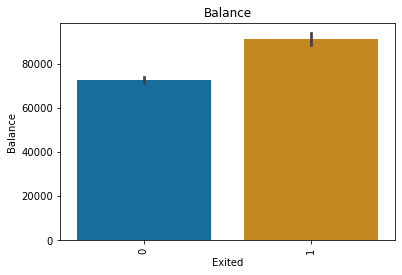

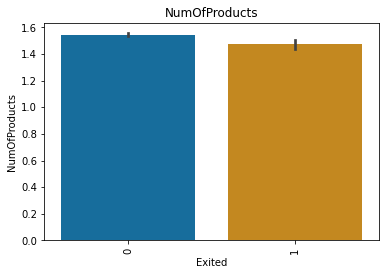

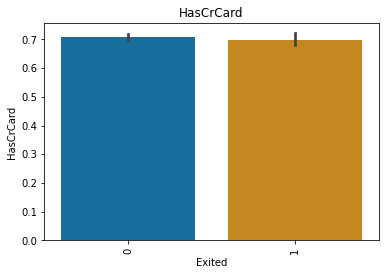

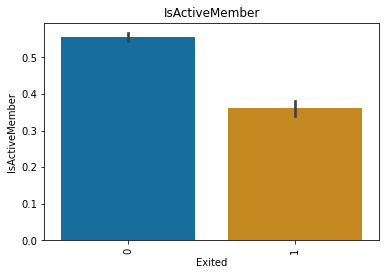

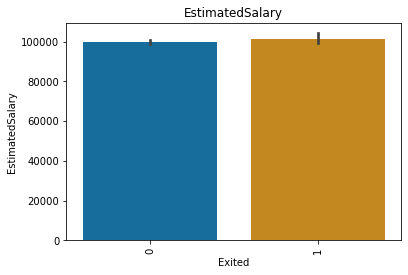

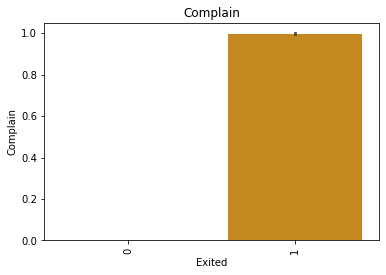

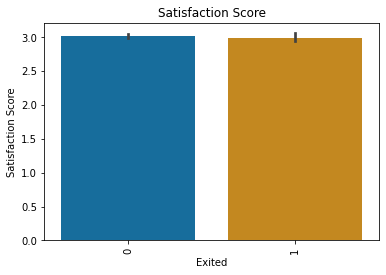

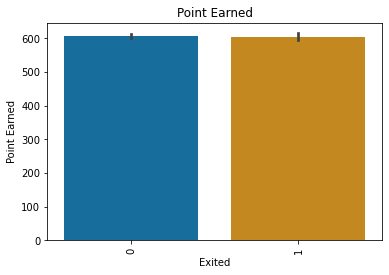

In [33]:
# Bivariate Analysis
#t=1
for i in num_columns:
    #plt.subplot(6,4,t)
    sns.barplot(y=df[i],x=df['Exited'],palette='colorblind')
    plt.xticks(rotation = 90)
    plt.title(i)
    #t+=1
#plt.tight_layout()
    plt.show()

## Multivariate Analysis

In [34]:
cnv    =  [ 'Age', 'Balance','EstimatedSalary'] #Continuous numerical variables
ODim   =  ['Complain',  'Tenure', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'Satisfaction Score', 'Geography', 'Gender', 'Card Type']

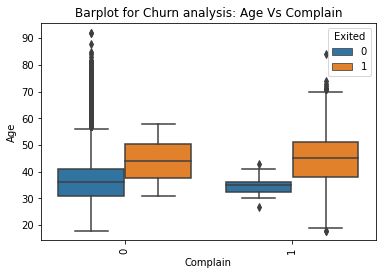

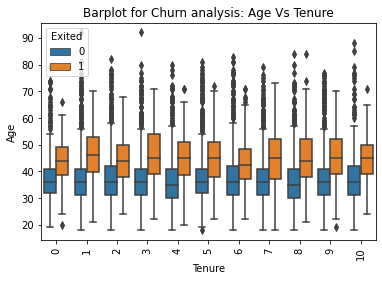

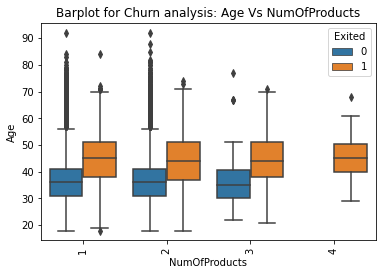

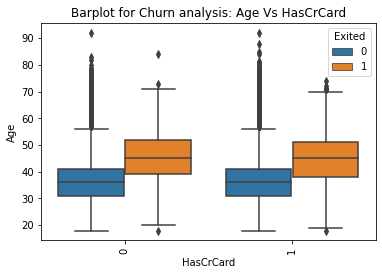

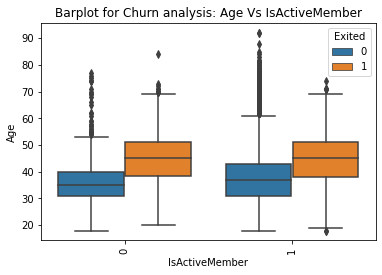

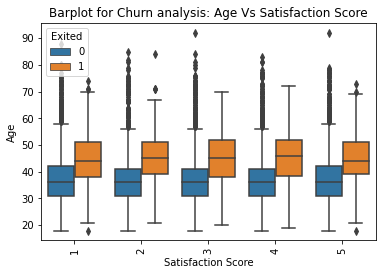

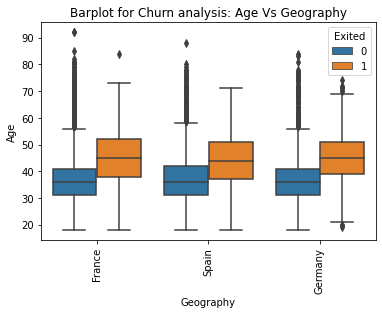

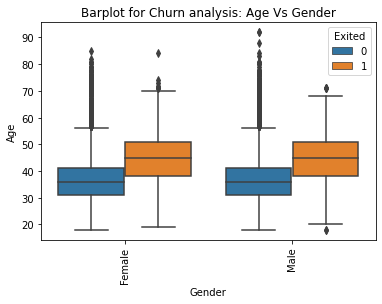

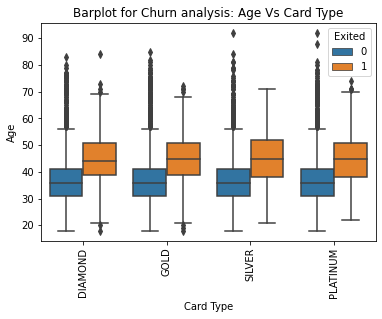

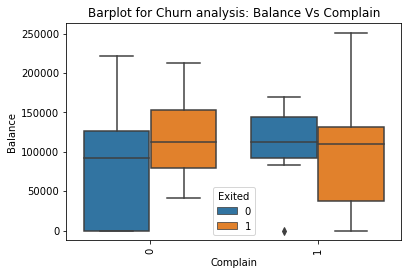

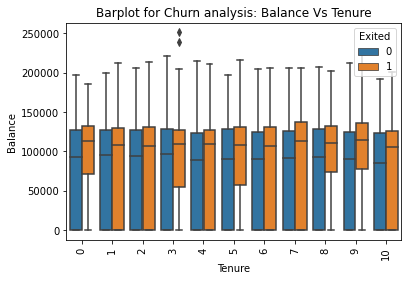

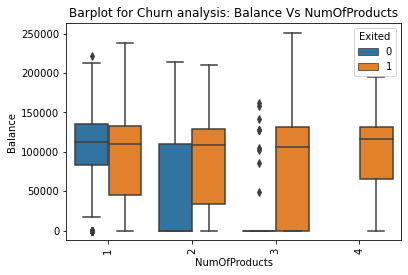

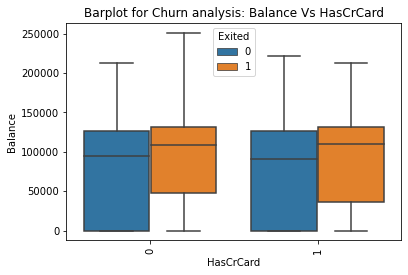

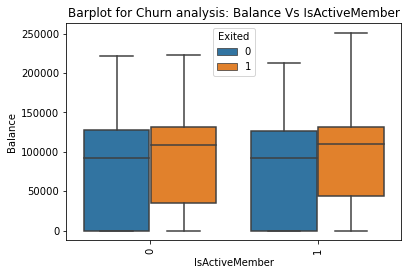

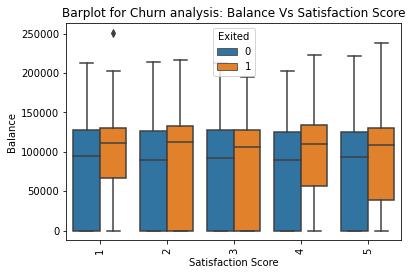

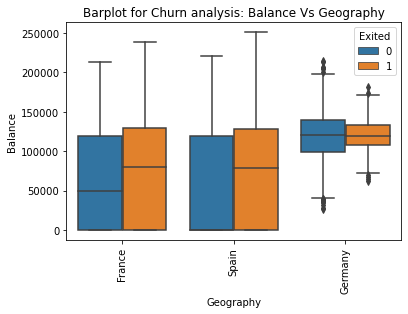

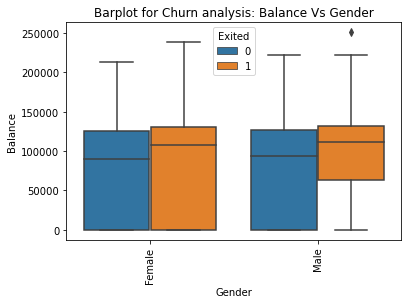

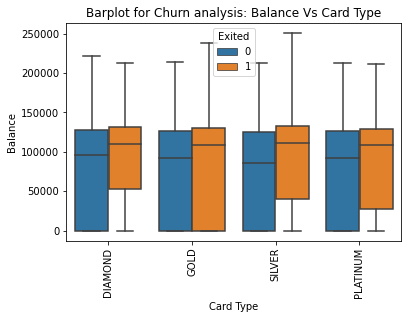

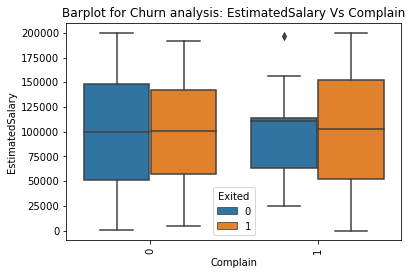

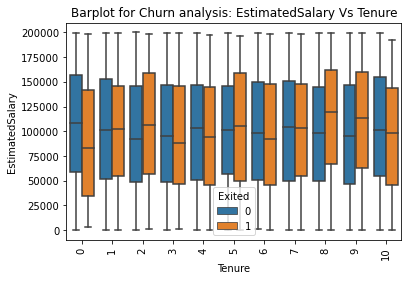

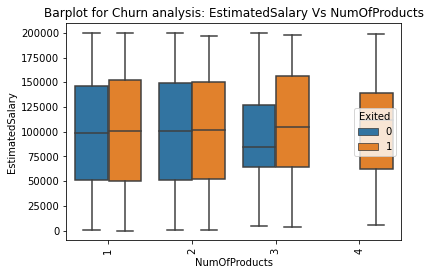

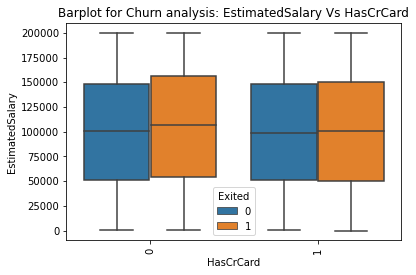

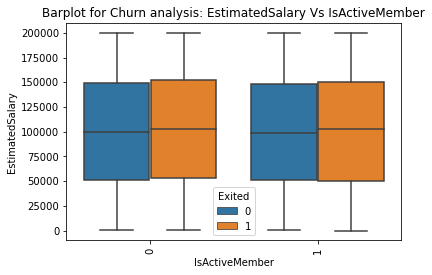

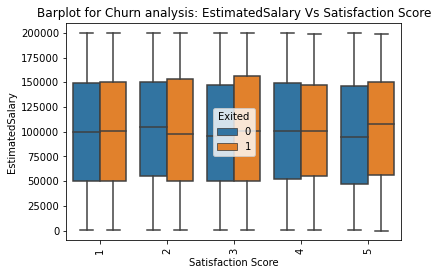

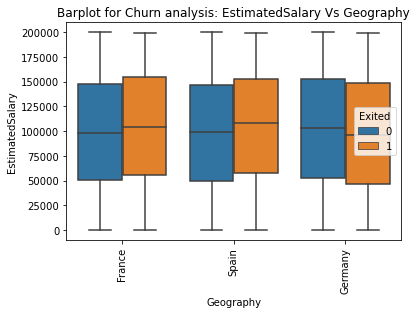

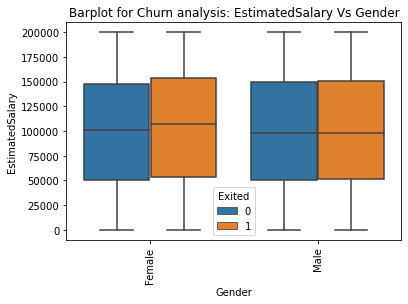

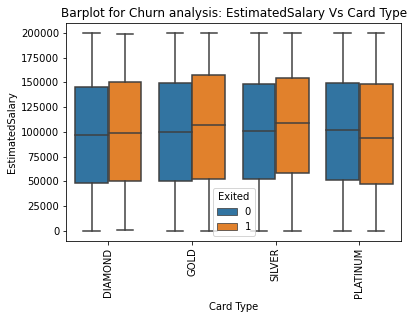

In [35]:
j = 0
for i in range(len(cnv)):
    for j in range(len(ODim)):
        sns.boxplot(data=df, x = ODim[j],y = cnv[i], hue='Exited')
        ttle =  'Barplot for Churn analysis: ' +  cnv[i] +  ' Vs ' + ODim[j]
        plt.xticks(rotation = 90)
        plt.title(ttle)
        plt.show()

In [36]:
MDim   =  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','EstimatedSalary',\
           'Satisfaction Score', 'Point Earned']

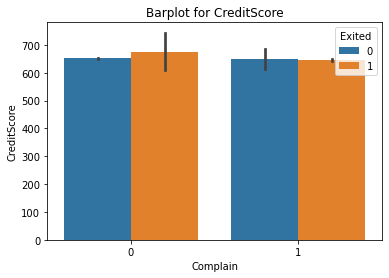

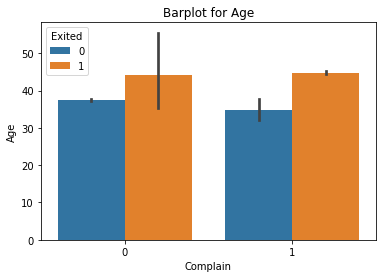

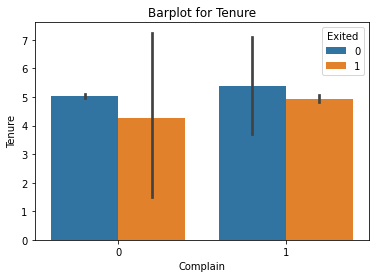

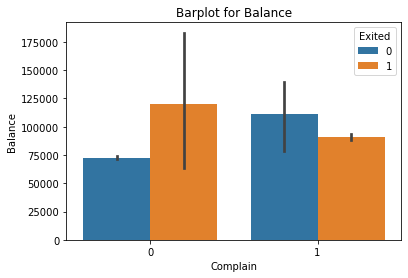

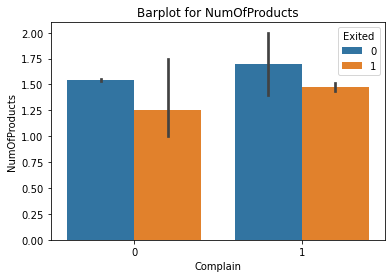

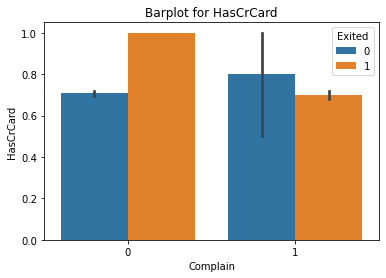

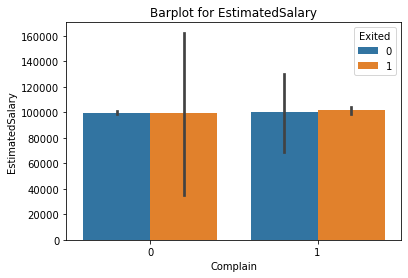

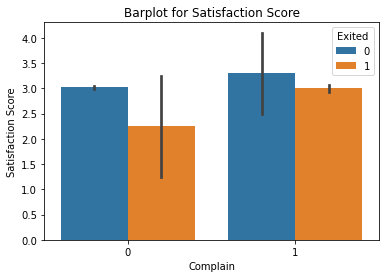

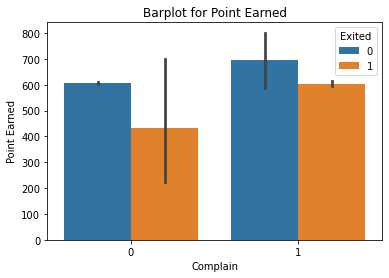

In [37]:
for i in range(len(MDim)):
    sns.barplot(data=df,x = ODim[0],y = MDim[i], hue='Exited')
    ttle =  'Barplot for ' +  MDim[i]
    plt.title(ttle)
    plt.show()

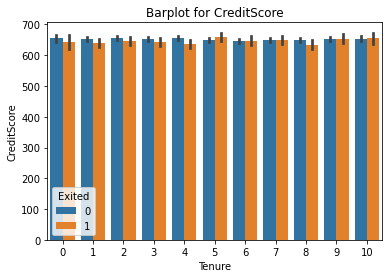

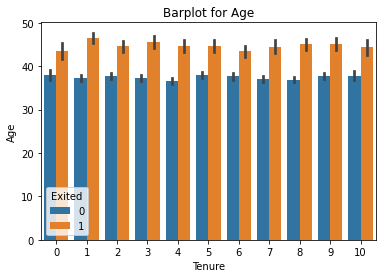

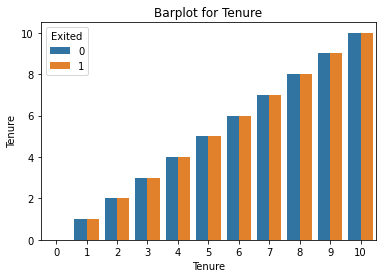

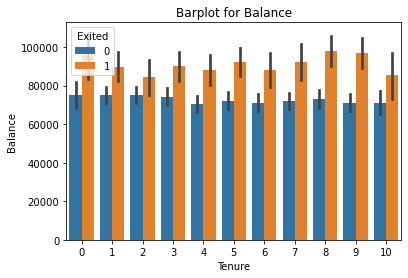

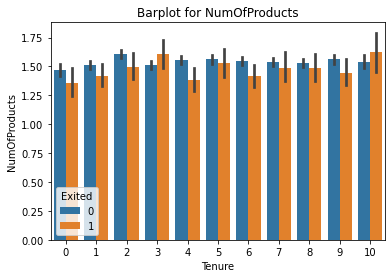

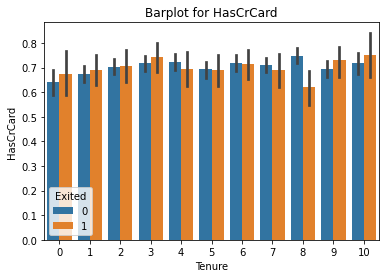

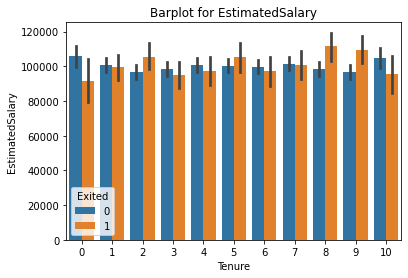

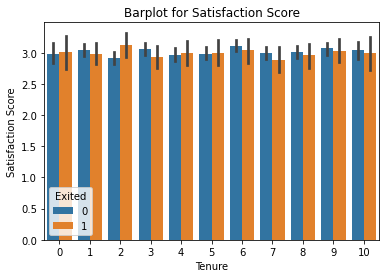

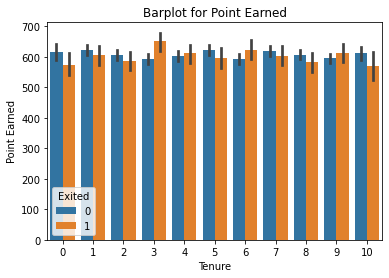

In [38]:
for i in range(len(MDim)):
    sns.barplot(data=df,x = ODim[1],y = MDim[i], hue='Exited')
    ttle =  'Barplot for ' +  MDim[i]
    plt.title(ttle)
    plt.show()

In [39]:
print("Our dataset for further analysis has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

Our dataset for further analysis has 10000 rows and 15 columns


In [40]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### a) multi-collinearity

In [41]:
df_num  = df.select_dtypes(exclude=['string','object'])
numcols = df_num.columns

In [42]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

In [43]:
X   =  df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned']]

In [44]:
vif = calculate_VIF(X)

In [45]:
vif.loc[vif['VIF'] > 5]

,VIF,variable
0,24.041228,CreditScore
1,13.981118,Age
4,7.814943,NumOfProducts
9,5.278663,Satisfaction Score
10,7.539827,Point Earned


In [46]:
vif.loc[vif['VIF'] > 5, 'variable']

0            CreditScore
1                    Age
4          NumOfProducts
9     Satisfaction Score
10          Point Earned
Name: variable, dtype: object

### Observation

The following variables have VIF value more than the threshold value of 5:

* 1              CreditScore
* 2                      Age
* 3            NumOfProducts
* 4       Satisfaction Score
* 5             Point Earned

**We need to remove the highly collinear variables.**

In [47]:
remove_high_vif(X)

dropping 'CreditScore' at index: 0
dropping 'Age' at index: 0
dropping 'Point Earned' at index: 8
dropping 'NumOfProducts' at index: 2
Remaining variables:
Index(['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score'],
      dtype='object')


,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score
0,2,0.00,1,1,101348.88,1,2
1,1,83807.86,0,1,112542.58,1,3
2,8,159660.80,1,0,113931.57,1,3
3,1,0.00,0,0,93826.63,0,5
4,2,125510.82,1,1,79084.10,0,5
...,...,...,...,...,...,...,...
9995,5,0.00,1,0,96270.64,0,1
9996,10,57369.61,1,1,101699.77,0,5
9997,7,0.00,0,1,42085.58,1,3
9998,3,75075.31,1,0,92888.52,1,2


In [48]:
X_  =  X[['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score']]

In [49]:
vif = calculate_VIF(X_)

In [50]:
vif

,VIF,variable
0,3.316212,Tenure
1,2.329828,Balance
2,2.912963,HasCrCard
3,1.942677,IsActiveMember
4,3.298047,EstimatedSalary
5,1.282748,Complain
6,4.086380,Satisfaction Score


In [51]:
vif.loc[vif['VIF'] > 5]

,VIF,variable


Let us get the name of the non-collinear variables.

In [52]:
vif.loc[vif['VIF'] <= 5, 'variable']

0                Tenure
1               Balance
2             HasCrCard
3        IsActiveMember
4       EstimatedSalary
5              Complain
6    Satisfaction Score
Name: variable, dtype: object

### Observation 

The following 7 variables are non-collinear:
1)               Tenure
2)               Balance
3)             HasCrCard
4)        IsActiveMember
5)       EstimatedSalary
6)             Complain
7)    Satisfaction Score

In [53]:
colc      =  df.describe(include="object").columns 
colc

Index(['Geography', 'Gender', 'Exited', 'Card Type'], dtype='object')

In [54]:
Xnames =  ['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score'] 

### b) Distribution of variables

In [55]:
X_   =  df[['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score']]

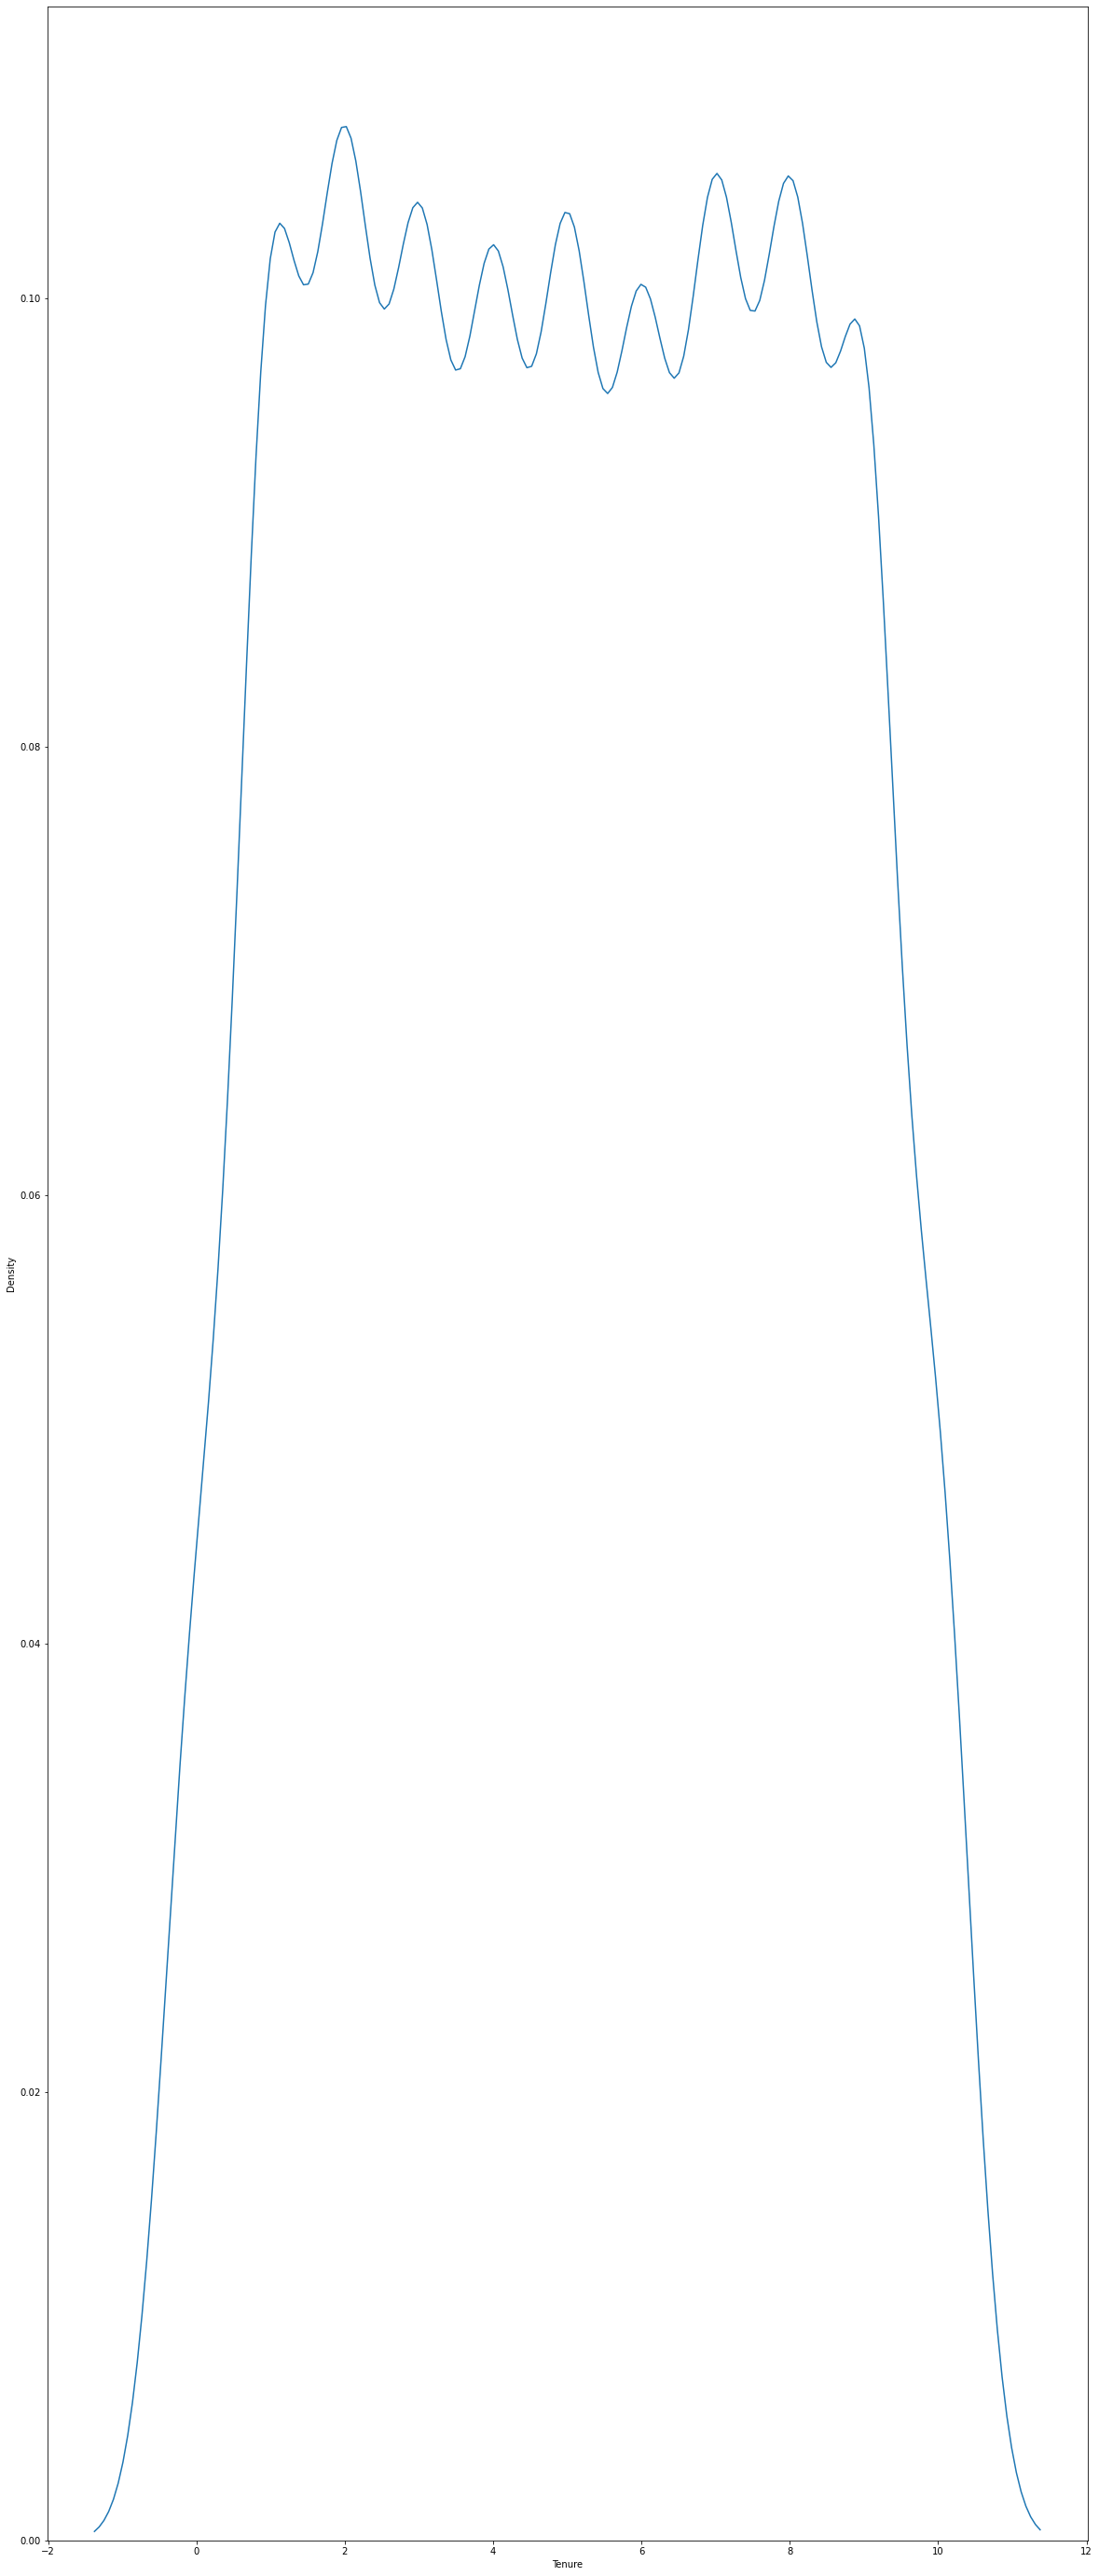

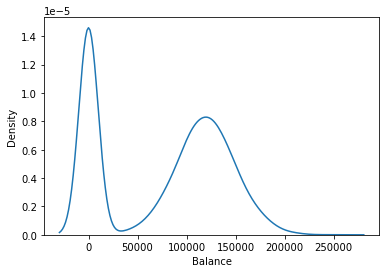

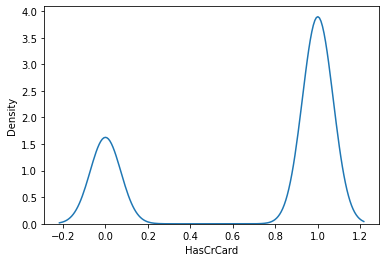

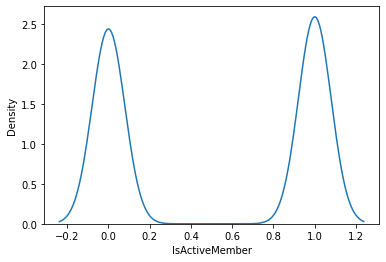

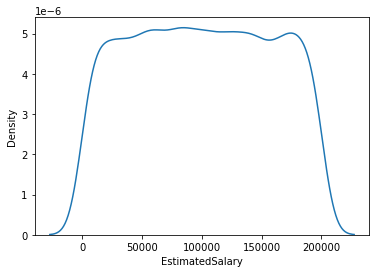

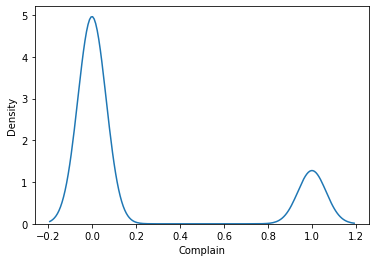

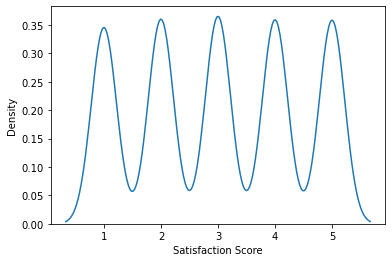

In [56]:
l      =   X_.columns
plt.figure(figsize = (20,50))
for i in range(l.shape[0]):
    sns.kdeplot(X_[l[i]])
    plt.xlabel(l[i])
    plt.show()

### Observation
None of the variables are normally distributed.

### c) Presence of outliers and its treatment

Outliers badly affect mean and standard deviation of the dataset. · It increases the error variance and reduces the power of statistical tests. By applying outlier treatment, machine learning practitioners can handle extreme values effectively. The primary goals of outlier treatment are: Identifying Outliers: Through various statistical methods, such as visualizations and mathematical approaches, outliers can be detected within a dataset.

We are interested to identify the outliers in our continuos numerical variables such as 'Age',  'Balance',  'EstimatedSalary' that affects the mean & standard deviation rather than the discrete numerical variables. Discrete variables are typically categorical, meaning they take on a limited number of values or categories. 

### However, if the outlier is physically possible you should consider it.

### We shall detect outliers in the continuous numerical variables

In [57]:
cnv     = ['Age', 'Balance', 'EstimatedSalary']


Feature :Age Lower_quartile: 14.0 ,Upper_quartile: 62.0 

Max value: 92 Minimum value: 18

Greater than UpperIQR : 359, Less than lower_IQR : 0 ,  zero_count:  0

Variable Age has outliers


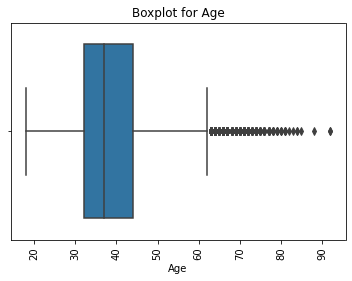


Feature :Balance Lower_quartile: 191466.36000000002 ,Upper_quartile: 319110.60000000003 

Max value: 250898.09 Minimum value: 0.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable Balance has NO outliers


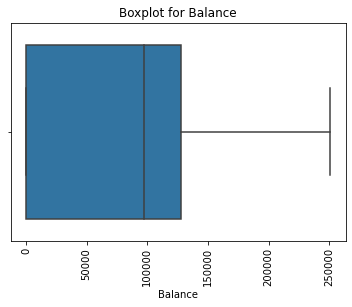


Feature :EstimatedSalary Lower_quartile: 96577.09624999999 ,Upper_quartile: 296967.45375 

Max value: 199992.48 Minimum value: 11.58

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable EstimatedSalary has NO outliers


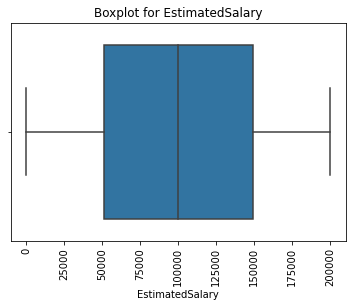

In [58]:
for i in range(len(cnv)):
    identify_outliers(df, cnv[i])

### Observations



We have checked the presence of outliers in the continuous numerical variables ('Age', 'Balance', 'EstimatedSalary').
Only the variable, Age is having the outlier. We observe that the maximum value is 92 and it is a valid & phisically possible value. **Hence, we will retain the outliers for the variable, Age**. 

### d) statistical significance of variables

#### 1 Numerical variables

An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated group of numerical variables to determine if there is a significant difference between the two.

Hypotheses are assumptions about reality whose validity is possible but not yet proven. Two hypotheses are always formulated that assert exactly the opposite. These two hypotheses are the null hypothesis and the alternative hypothesis.

Null hypothesis  𝐻0
  Alternative hypothesis  𝐻1
 

There is no mean difference between the two groups in the population.

Two population means are equal. The two groups are from the same population.  𝐻0
 : μ1 = μ2

Example: There is no difference between each variable of those who churned and who not churned.

There is a mean difference between the two groups in the population.

The two population means are not equal. The two groups are not from the same population.  𝐻1
 : μ1≠ μ2

There is mean difference between the two groups in the population.

#### Observations
Based on the unpaired t test, we find that

**There is a statistically significant difference between the mean values of two groups of the Variable, listed below:**

1) CreditScore 2) Age 3) Balance 4) NumOfProducts 5) IsActiveMember 6) Complain


**There is no statistically significant difference between the mean values of two groups of the Variable, listed below:**
1) Tenure 2) HasCrCard 3) EstimatedSalary 4) Satisfaction Score 5) Point Earned

### Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. 

Null hypothesis: $H_0$: Samples are drawn from normal distribution.
Alternative hypothesis: $H_1$: Samples are NOT drawn from normal distribution. 

We shall conduct normality test for continuous numerical variables.

In [60]:
for  col1 in cnv :
    Shapiro_Wilk(df, col1)

stat=0.944, p=0.000
Age Probably not Gaussian
stat=0.846, p=0.000
Balance Probably not Gaussian
stat=0.957, p=0.000
EstimatedSalary Probably not Gaussian


#### Observations

Based on the Shapiro test for normality, we observe the following: 'Age', 'Balance', 'EstimatedSalary' are not normally dustributed.

###  Calculate Correlation Between Continuous & Binary Target Variable

Point biserial correlation is used to calculate the correlation between a binary categorical variable (a variable that can only take on two values) and a continuous variable and has the following properties:

Point biserial correlation can range between -1 and 1.
For each group created by the binary variable, it is assumed that the continuous variable is normally distributed with equal variances.
For each group created by the binary variable, it is assumed that there are no extreme outliers.

The hypotheses for point biserial correlation thus result in:

Null hypothesis: The correlation coefficient r = 0 (There is no correlation)

Alternative hypothesis: The correlation coefficient r ≠ 0 (There is a correlation)

In [61]:
y    =  df['Exited']
for  col1 in cnv:
    x   =  df[col1]
    pointbiserialr(df, col1, y)

stat=0.285, p=0.000
Age There is a correlation
stat=0.119, p=0.000
Balance There is a correlation
stat=0.012, p=0.212
EstimatedSalary There is no correlation


### Observations

There is **no correlation** between the following variables and the Target binary variable:

* 1) Age
* 2) EstimatedSalary

There is **a correlation** between the following variables and the Target binary variable:
1) Balance

### Chi sqaure test of independence

The objective is to determine whether the association between two qualitative variables is statistically significant. The formulation of the hypotheses for this statistical analysis is something like this. 

Null Hypothesis (H0): There is no substantial relationship between the two variables (in case of independence test), or there is no difference

Alternative Hypothesis (H1): There is a substantial relationship between the two variables (in case of independence test), or there is a difference

Read more at: https://analyticsindiamag.com/ai-mysteries/how-to-use-the-chi-square-test-for-two-categorical-variables/

In [62]:
y   =  df['Exited']
i   =  1

In [63]:
colscat         =   ['Geography', 'Gender', 'Card Type']
for  col1 in colscat:
    x   =  df[col1]
    chk_chisq(i, col1)
    i   += 1


1: Variable, Geography

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
(300.6264011211942, 5.245736109572763e-66, 2, array([[3992.1468, 1021.8532],
       [1997.6658,  511.3342],
       [1972.1874,  504.8126]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Geography and Target variable are dependent

 ChiSq Stat: 300.6264011211942, P value: 5.245736109572763e-66

2: Variable, Gender

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
(112.39655374778587, 2.9253677618642e-26, 1, array([[3617.1366,  925.8634],
       [4344.8634, 1112.1366]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Gender and Target variable are dependent

 ChiSq Stat: 112.39655374778587, P value: 2.9253677618642e-26

3: Variable, C

### Observation

1) There is a **substantial relationship** between the two variables Geography and Target since chi2_stat = 300.63, p = 5.246 e-66

2) There is a **substantial relationship** between the two variables Gender and Target since chi2_stat = 112.40, p = 2.9254 e-26

3) There is **NO substantial relationship** between the two variables Card Type and Target since chi2_stat = 5.05, p = 0.167941


### e) Class imbalance and its treatment

<AxesSubplot:>

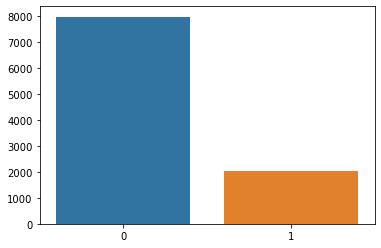

In [64]:
b = y.value_counts()
sns.barplot(x = b.index,y = b.values)

In [65]:
y.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [66]:
y.value_counts(normalize  = True)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

### Observations

1. Dataset is **highly imbalanced** as the minority class, ** 1** denoting Exited is having around 20.38% of observations while the other class, **'0'** denoting "Not Exited" is having the balance of 79.62% of the observations.

2. So, we need to choose the model performance measure carefully to avoid bias to the majority class.

3. Precision and recall are common metrics used when evaluating classification models for detection of a certain important class. Recall represents how many samples of the important. class was discovered by the model of all the samples in the class, while precision represents the accuracy of predictions for that certain class. 

In this project, the important class is "Exited". True positives is the number of correctly identified data points of the important class, False positives is the number of data points incorrectly identified as important and False negatives is the number of data points incorrectly identified as not important.

So, we shall use **Recall of the minority class** as our measure of model performance.

### SMOTE

problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

We shall apply SMOTE on training data

### Feature Engineering

#### 1) Whether any transformations required
#### 2) Scaling the data
#### 3) Feature selection 
#### 4) Dimensionality reduction

### 1) Whether any transformations required

Data transformation is used when data needs to be converted to match that of the destination system.


* We have extracted Shipping_month, Shipping_weekday from the variable, shipping date (DateOrders).
* We have extracted order_month, order_weekday from the variable, order date (DateOrders).
* We have derived our target variable, Target from the variable, Order Status by assining the value 1 for Order Status = "SUSPECTED FRAUD" else 0.
* We need to perform label encoding to make our data suitable for model building.

### Perform Label encoding

In Python Label Encoding, we need to replace the categorical value using a numerical value ranging between zero and the total number of classes minus one. REf: https://www.javatpoint.com/label-encoding-in-python

In [ ]:
def  label_enc(df, col):
     colx      =  col + '_code'
     df[colx]   =  my_label.fit_transform(df[col])  

In [ ]:
new_df            =   X.copy()
new_df['Target']  =   df['Target']

In [ ]:
new_df.columns

In [ ]:
my_label          =  preprocessing.LabelEncoder()   
cat_newdf         =  new_df.select_dtypes(exclude=['int64','float64'])
cat_cols          =  cat_newdf.columns
for col in cat_cols:
    label_enc(new_df, col)

### 2) Scaling the data

In Data Processing, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

The concept of standardization comes into picture when continuous independent variables are measured at different scales.
https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

Data scaling is applied to numeric columns. In our dataset we have six continuous numerical columns:. 
1) Days for shipment (scheduled)
2) Order Item Discount Rate
3) Order Item Profit Ratio
4) Order Item Quantity
5) Order Profit Per Order
6) Product Price

The script below filters these **six** columns and removes the remaining columns.

In [ ]:
data_numeric = new_df.filter(['Days for shipment (scheduled)', 'Order Item Discount Rate',
'Order Item Profit Ratio', 'Order Item Quantity', 'Order Profit Per Order', 'Product Price'], axis = 1)

data_numeric.head()

Let’s plot some statistical values for the columns in our dataset using the describe() method.

In [ ]:
data_numeric.describe()

### Min/Max Scaling

Min/Max scaling normalizes the data between 0 and 1 by subtracting the overall minimum value from each data point and dividing the result by the difference between the minimum and maximum values.

The Min/Max scaler is commonly used for data scaling when the maximum and minimum values for data points are known. For instance, you can use the min/max scaler to normalize image pixels having values between 0 and 255.

You’ll want to use the MinMaxScaler class from the sklearn.preprocessing module to perform min/max scaling. The fit_transform method of the class performs the min/max scaling on the input Pandas Dataframe, as shown below:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms               = MinMaxScaler()
data_numeric_mns  = mms.fit_transform(data_numeric)

Similarly, the script below converts the NumPy array returned by the fit_transform() to a Pandas Dataframe which contains our normalized values between 0 and 1.

In [ ]:
data_numeric_mns_df  = pd.DataFrame(data_numeric_mns,
                              columns = data_numeric.columns)
data_numeric_mns_df.head()

###  Feature selection

## Automatically select the number of features

The RFE method is available via the RFE class in scikit-learn.

RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

It can then be applied to the dataset by calling the transform() function.

In [ ]:
###
### We need to remove the not-standardized 6 columns and add standardised 6 columns
###
new_df.drop('Days for shipment (scheduled)', axis = 1, inplace = True)
new_df.drop('Order Item Discount Rate',      axis = 1, inplace = True)
new_df.drop('Order Item Profit Ratio',       axis = 1, inplace = True)
new_df.drop('Order Item Quantity',           axis = 1, inplace = True)
new_df.drop('Order Profit Per Order',        axis = 1, inplace = True)
new_df.drop('Product Price',                 axis = 1, inplace = True)                        

new_df['Days for shipment (scheduled)']    =  data_numeric_mns_df['Days for shipment (scheduled)'] 
new_df['Order Item Discount Rate']         =  data_numeric_mns_df['Order Item Discount Rate'] 
new_df['Order Item Profit Ratio']          =  data_numeric_mns_df['Order Item Profit Ratio'] 
new_df['Order Item Quantity']              =  data_numeric_mns_df['Order Item Quantity'] 
new_df['Order Profit Per Order']           =  data_numeric_mns_df['Order Profit Per Order'] 
new_df['Product Price']                    =  data_numeric_mns_df['Product Price'] 

# Adding the target variable
new_df['Target']                           =  df['Target']


In [ ]:
y             =    new_df['Target']
X             =    new_df.drop(['Target'], axis = 1)                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

In [ ]:
new_df.info()

In [ ]:
new_df.columns

In [ ]:
new_df.dtypes

In [ ]:
X    =   new_df[['Days for shipment (scheduled)', 'Order Item Discount Rate' ,'Order Item Id',
                 'Order Item Profit Ratio','Order Item Quantity','Order Profit Per Order',
                 'Product Price','Customer Zipcode','Type_code',
       'Delivery Status_code', 'Late_delivery_risk_code', 'Category Name_code',
       'Customer City_code', 'Customer Country_code', 'Customer Segment_code',
       'Customer State_code', 'Customer Street_code', 'Department Name_code',
       'Market_code', 'Order City_code', 'Order Country_code',
       'Order Region_code', 'Order State_code', 'Product Name_code',
       'Shipping Mode_code', 'Shipping weekday_code', 'Shipping month_code',
       'order weekday_code', 'order month_code', 'Target_code']]

In [ ]:
y             =    X['Target_code']
X             =    X.drop(['Target_code'], axis = 1)                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

In [ ]:
# create pipeline
rfe                    =     RFE(estimator = RandomForestClassifier(), n_features_to_select = 15)
model                  =     RandomForestClassifier(random_state = 42)
pipeline               =     Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv                     =    RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores               =    cross_val_score(pipeline, X, y, scoring = 'balanced_accuracy', cv = cv, n_jobs = -1, error_score = 'raise')


In [ ]:
# report performance
print('balanced_accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

### Observation

we can see the RFE that uses a Random Forest and selects 15 features and then fits a model on the selected features achieves a balanced accuracy of about 96.2 %. 

**Balanced accuracy** in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

Fit an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

In [ ]:
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
x_names   =   X.columns
for i in range(X.shape[1]):
     namex    =  x_names[i]
     print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
selected_X  =   []

In [ ]:
for i in range(X.shape[1]):
     namex    =  x_names[i]
     if (rfe.support_[i] == True):
         selected_X.append(namex)
         print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))
print("\nSelected important features {}".format(selected_X))

In [ ]:
selected_X =['Order Item Id', 'Customer Zipcode', 'Type_code', 'Delivery Status_code', 'Customer City_code', 'Customer State_code', 'Customer Street_code', 'Order City_code', 'Order Country_code', 'Order State_code', 'Shipping Mode_code', 'Shipping weekday_code', 'Shipping month_code', 'order weekday_code', 'order month_code']

### Observation

We have selected 15 features which are important in predicting the target variable.

**We shall use this data for our model building.**

In [ ]:
X_   =    X.loc[:, selected_X]

X_.to_csv(r"E:\GL\Capstone.csv", index = False)
y.to_csv(r"E:\GL\Capstone.csv", index = False)

In [ ]:
X_.shape

In [ ]:
time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

###  Dimensionality reduction

Since we have selected top 15 variables affecting the dependent variable, our dataset is Not Huge. We are not going to apply dimensionality reduction such as Principal Component Analysis or Factor Analysis etc.

We use PCA when you have high-dimensional data to reduce its dimensionality while preserving most of the variance, simplifying analysis and visualization.

## 4) Model evaluation

###  Base Model

In [ ]:
mod=[]
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
ck_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
ck_test=[]
from sklearn.metrics import *
def model_validation(model,x_train,y_train,x_test,y_test):
    m=model
    m.fit(x_train,y_train)
    hard_train=m.predict(x_train)
    hard_test=m.predict(x_test)
    soft_test=m.predict_proba(x_test)[:,1]
    
    print('classification report\n',classification_report(y_test,hard_test))
    fpr,tpr,thres=roc_curve(y_test,soft_test)
    plt.title(f'ROC AUC:{round(roc_auc_score(y_test,soft_test),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()

    con_mat=confusion_matrix(y_test,hard_test)
    sns.heatmap(con_mat,annot=True)
    plt.show()
    
    inp=input('Do you want to save the model in score card? Y/N')
    if inp.lower()=='y':
        global scorecard_train,scorecard_test
        mod.append(str(model))
        acc_test.append(accuracy_score(y_test,hard_test))
        pre_test.append(precision_score(y_test,hard_test))
        rec_test.append(recall_score(y_test,hard_test))
        f1_test.append(f1_score(y_test,hard_test))
        ck_test.append(cohen_kappa_score(y_test,hard_test))
        scorecard_test=pd.DataFrame({'Model':mod,'Accuracy_test':acc_test,'Precision_test':pre_test,'Recall_test':rec_test,'f1_score_test':f1_test,'Cohen_kappa_test':ck_test})
        acc_train.append(accuracy_score(y_train,hard_train))
        pre_train.append(precision_score(y_train,hard_train))
        rec_train.append(recall_score(y_train,hard_train))
        f1_train.append(f1_score(y_train,hard_train))
        ck_train.append(cohen_kappa_score(y_train,hard_train))
        scorecard_train=pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Precision_train':pre_train,'Recall_train':rec_train,'f1_score_train':f1_train,'Cohen_kappa_train':ck_train})


In [ ]:
X_

In [ ]:
y

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X_,y,test_size=0.3,random_state=100)

In [ ]:
model_validation(DecisionTreeClassifier(),xtrain,ytrain,xtest,ytest)

In [ ]:
scorecard_train

In [ ]:
scorecard_test

In [ ]:
m=DecisionTreeClassifier()
m.fit(xtrain,ytrain)
hard_train=m.predict(xtrain)
hard_test=m.predict(xtest)
soft_test=m.predict_proba(xtest)[:,1]

In [ ]:
xtrain.columns

In [ ]:
plot_tree(m,feature_names=list(xtrain.columns))
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have a trained decision tree model `model`
def extract_rules(model, feature_names):
    """
    Extracts rules from a decision tree.

    Args:
        model: The trained decision tree model.
        feature_names: A list of feature names.

    Returns:
        A list of extracted rules.
    """

    rules = []
    def _extract_rules_recursive(node, rule):
        if m.tree_.children_left[node] == -1:  # Leaf node
            rules.append(rule)
        else:
            feature = feature_names[m.tree_.feature[node]]
            threshold = m.tree_.threshold[node]
            left_rule = rule + f"{feature} <= {threshold}"
            right_rule = rule + f"{feature} > {threshold}"
            _extract_rules_recursive(m.tree_.children_left[node], left_rule)
            _extract_rules_recursive(m.tree_.children_right[node], right_rule)

    _extract_rules_recursive(0, "")  # Start from the root node
    return rules




In [ ]:
feature_names = xtrain.columns
rules = extract_rules(m, feature_names)
print(rules)

##### Dictdiffer is a helper module that helps you to diff and patch dictionaries.

In [ ]:
### ! pip install dictdiffer # Remove the comment character "#" first time 

## Problem Statement

## Data Dictionary

## Import Libraries

In [ ]:
! pip install catboost

In [ ]:
import   pandas                   as      pd
import   numpy                    as      np
import   matplotlib.pyplot        as      plt

In [ ]:
from   sklearn.svm                import    SVC
from   sklearn.ensemble           import    RandomForestClassifier
from   sklearn.model_selection    import    StratifiedKFold
from   sklearn.model_selection    import    StratifiedGroupKFold
from   sklearn.model_selection    import    RandomizedSearchCV

In [ ]:
from    sklearn.linear_model    import  LogisticRegression
from    sklearn.tree            import  DecisionTreeClassifier
from    sklearn.neighbors       import  KNeighborsClassifier
from    sklearn.naive_bayes     import  GaussianNB
from    sklearn.ensemble        import  RandomForestClassifier    
from    xgboost                 import  XGBClassifier  
from    sklearn.ensemble        import  AdaBoostClassifier

In [ ]:
from   sklearn.metrics            import  make_scorer, precision_score, recall_score, f1_score
from   sklearn.metrics            import  confusion_matrix, classification_report
from   sklearn.model_selection    import  train_test_split,cross_val_score,cross_val_predict

In [ ]:
from dictdiffer import diff

In [ ]:
performance_hyper_df       =    pd.DataFrame()

In [ ]:
'''
We need to know what changed after getting the best parameters by performing hyper parameter tuning,
'''
def  what_changed(model_name, first_dict, second_dict):
### First dict 
       first_dictKeys = list(first_dict.keys())
       first_dictKeys.sort()
       first_sorted_dict = {i: first_dict[i] for i in first_dictKeys}
### Second dict 
       second_dictKeys = list(second_dict.keys())
       second_dictKeys.sort()
       second_sorted_dict = {i: second_dict[i] for i in second_dictKeys}

       result = diff(first_sorted_dict, second_sorted_dict)
       print("Model name {}".format(model_name))
       return list(result)

In [ ]:
def  metrics_graph(df, model_names):
     print(df.columns)
     scores_req   =   ['roc_auc', 'precision', 'recall', 'F1 Weighted']
     for       scoring in   scores_req :
               df1      =  df.loc[df['Score'] == scoring, ['Name', 'Results']]
               df1.plot.box(column = "Results", by = "Name", figsize=(8, 6), grid=False, rot=90, fontsize = 15)
               txt      =  "Model performance using " + scoring
               plt.title(txt)
               plt.show()


### Zero division

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

zero_division{“warn”, 0.0, 1.0, np.nan}, default=”warn”
Sets the value to return when there is a zero division.

Notes: - If set to “warn”, this acts like 0, but a warning is also raised. - If set to np.nan, such values will be excluded from the average.

In [ ]:
def evaluate_model_performance(model, name, X, y):
    from  sklearn.model_selection import  StratifiedKFold
    from  sklearn.model_selection import  cross_val_score

    # Predict the response for training dataset
    classifier   =  model.fit(X, y)
    scores_req   =  ['roc_auc', 'precision', 'recall', 'F1 Weighted']
    df_model     =  pd.DataFrame()
    for scoring in scores_req:
        score_fn  =  scoring         

        print("\nPerformance Measure : %s" %scoring)

        if scoring == 'F1 Weighted':
            score_fn  =  make_scorer (f1_score, average = 'weighted', zero_division = 0)

        skf           =   StratifiedKFold(n_splits = 10, shuffle = True, random_state = 12345)
        cv_results    =   cross_val_score(model, X, np.ravel(y,order="c"), cv = skf, scoring = score_fn)
        msg = "%s" % (str(round(cv_results.mean(),2)) + " ± " + str(round(cv_results.std(),2)))
        print(msg)
        df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)
        indices_      =   list(range(1, 11))
        df_ind        =   pd.DataFrame({'Score' : scoring, 'Name' : name, 'Resuts' : cv_results,\
                                        'Mean-Sd' : msg}, index = indices_)
        df_model      =   pd.concat([df_model, df_ind]) 
    return df_model

In [ ]:
def get_default(model, X, y):
    model.fit(X, np.ravel(y,order="c"))
    print(model.get_params())
    return model.get_params()

In [ ]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [ ]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    

    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [ ]:
def evaluate_model_performance(name, model, x_train, y_train, x_test, y_test):
    from sklearn.metrics import recall_score, precision_score,roc_auc_score,f1_score  
    # Predict the response for training dataset
    classifier         =  model.fit(x_train, y_train)
    # print the model parameters
    print("Model parameters: {}".format(model.get_params()))
    predicted_train    =  classifier.predict(x_train)
    matrix             =  confusion_matrix(y_train, predicted_train)
    ###
    train_auroc        =  roc_auc_score(y_train, predicted_train)
    train_recall       =  recall_score(y_train, predicted_train)
    train_precision    =  precision_score(y_train, predicted_train)
    train_f1score      =  f1_score(y_train, predicted_train, average = 'weighted')
    ###
    print("\nTraining Data")
    print(matrix)
    draw_cm(y_train, predicted_train)
    measures_train      = classification_report(y_train, predicted_train) 
    print("\nTraining Data")
    print(measures_train) 
    draw_roc(y_train, predicted_train)
    # Predict the response for testing dataset
    predicted_test     =  classifier.predict(x_test)
    matrix1            =  confusion_matrix(y_test, predicted_test)
    ### 
    test_auroc         =  roc_auc_score(y_test, predicted_test)
    test_recall        =  recall_score(y_test, predicted_test)
    test_precision     =  precision_score(y_test, predicted_test)
    test_f1score       =  f1_score(y_test, predicted_test, average = 'weighted')
    ###    
    print("\nTest  Data")
    print(matrix1)
    draw_cm(y_test, predicted_test)
    measures_test     = classification_report(y_test, predicted_test) 
    print("\nTest  Data")
    print(measures_test) 
    draw_roc(y_test, predicted_test) 
    df_smote  =  pd.DataFrame({'Model' : name, 'Recall Training data' : train_recall, 'Recall Test data' : test_recall,\
                              'F1 Weighted Training data' : train_f1score, 'F1 Weighted Test data' : test_f1score,
                              'AUROC Training data' : train_auroc, 'AUROC Test data' : test_auroc,
                              'Precision Training data' : train_precision, 'Precision Test data' : test_precision},\
                              index = [0]) 
    return df_smote

#### Define dataframes

In [ ]:
df1_0    =   pd.DataFrame({'Model' : 'LR', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}, index = [0])
df1_0.reset_index()
dict = {'Model' : 'KNN', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df12 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'CART', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df13 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'NB', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df14  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'RF', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df15  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'XGBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df16  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'AdaBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df17  = pd.DataFrame(dict, index = [0])
##
df17_ = pd.concat([df1_0, df12, df13, df14, df15, df16, df17], ignore_index = True)
#

df_measures_untuned  =  df17_.copy()
df_measures_untuned.set_index(['Model'], inplace = True)
print(df_measures_untuned)

In [ ]:
df_0    =   pd.DataFrame({'Model' : 'LR', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}, index = [0])
df_0.reset_index()
dict = {'Model' : 'KNN', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df2 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'CART', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df3 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'NB', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df4  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'RF', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df5  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'XGBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df6  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'AdaBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df7  = pd.DataFrame(dict, index = [0])
##
df7_ = pd.concat([df_0, df2, df3, df4, df5, df6, df7], ignore_index = True)
#

df_measures_tuned  =  df7_.copy()
df_measures_tuned.set_index(['Model'], inplace = True)
print(df_measures_tuned)

### Load the Dataset

In [ ]:
print("\n Shape of X {}".format(X_.shape))
print("\n Shape of y {}".format(y.shape))

In [ ]:
y.value_counts()

In [ ]:
print("\nIndependent Variables {}".format(X_.columns))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_, y, train_size = 0.8, test_size = 0.2, random_state =3, stratify = y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### Performance measure for this project

**RECALL**

*Recall ensures that actual instances of fraud are not missed amongst the safe transactions.*

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.

In this way, recall provides some notion of the coverage of the positive class.

For imbalanced learning, recall is typically used to measure the coverage of the minority class.

Support beyond binary targets is achieved by treating multiclass and multilabel data as a collection of binary problems, one for each label. For the binary case, setting average='binary' will return F1 score for pos_label.

**PRECISION**

*Precision helps ensure safe transactions are not mistakenly classified as fraudulent.*

Hence, we choose RECALL for the minority class as our measure of performance.

### Synthetic Minority Oversampling TEchnique (SMOTE)

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to **oversample** the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

**Undersampling** is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

Undersampling can result in the loss of relevant information by removing valuable and significant patterns.
Undersampling is appropriate when there is plenty of data for an accurate analysis. The data scientist uses all of the rare events but reduces the number of abundant events to create two equally sized classes.

We have **4062 (2.25%) observations for the minority class** and 176457 (97.75%) observations for the majority class. 
So, it was decided to go for **Oversampling** method.

### A)  Before SMOTE

In [ ]:
start_time   =  datetime.now()

In [ ]:
model_names  =  ["LR","KNN","CART","NB","RF","XGBoost","AdaBoost"]
models       =  [LogisticRegression(max_iter = 3000),\
                 KNeighborsClassifier(),\
                 DecisionTreeClassifier(),\
                 GaussianNB(),\
                 RandomForestClassifier(),\
                 XGBClassifier(),\
                 AdaBoostClassifier()]

In [ ]:
metrics_df    =  pd.DataFrame()
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      print("i = %d Model = %s" %(i,model_x))
      classifier         =   models[i] 
      mp_df         =  evaluate_model_performance(model_x, classifier, X_train, y_train, X_test, y_test)
      metrics_df    =  pd.concat([metrics_df, mp_df])

In [ ]:
metrics_df.sort_values(by=['Recall Test data'], ascending = False)

In [ ]:
time_elapsed = datetime.now() - start_time
print('\nExecution Time for evaluating the performance of 7 models on Raw data not treated for data imbalance')
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

### b) After SMOTE

In [ ]:
start_time   =  datetime.now()

For appling SMOTE, we have splitted the data into training and test datasets in the ratio, 80%: 20% and applied SMOTE only on Training data.

As we need to apply SMOTE only on Training data, we have not applied K Fold cross validation.

In [ ]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

In [ ]:
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [ ]:
model_names  =  ["LR","KNN","CART","NB","RF","XGBoost","AdaBoost"]

In [ ]:
models       =  [LogisticRegression(max_iter = 3000),\
                 KNeighborsClassifier(),\
                 DecisionTreeClassifier(),\
                 GaussianNB(),\
                 RandomForestClassifier(),\
                 XGBClassifier(),\
                 AdaBoostClassifier()]

In [ ]:
SMOTE_metrics_df =  pd.DataFrame()
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      print("i = %d Model = %s" %(i,model_x))
      classifier         =   models[i] 
      smote_df = evaluate_model_performance(model_x, classifier, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
      SMOTE_metrics_df =  pd.concat([SMOTE_metrics_df,smote_df])

In [ ]:
SMOTE_metrics_df.sort_values(by=['Recall Test data'], ascending = False)

In [ ]:
time_elapsed = datetime.now() - start_time
print('\nExecution Time for evaluating the performance of 7 models on the data treated for data imbalance')
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

### Observations

Without applying SMOTE technique to treat the data imbalance, the **best model is Decision Tree (CART)** has the very good recall of 100 % Recall & 100% F1-Weighted score for training data and recall of 92.7% Recall & 99.68% F1-Weighted score for test data. 

After applying SMOTE technique to treat the data imbalance, the **best model is AdaBoost** giving the very good recall of 99.9999 % using training data  and 99.75 % for test data and the F1- weighted is 98.95 % using training data and 98.31% using test data.

**Decision Tree (CART)** gives the recall of 100 % using training data and 93.10 % using test data. F1-weighted is 100% using training data and 93.10 % using test data.

So far, the **performance of Decision Tree model is good**. Deecion Tree models are preferred as they require fewer computational resources to construct and make predictions, Decision Trees are quicker than Random Forests. They help develop simple models and exploratory data analysis because they are also reasonably simple to interpret. 


## 5) Comparison to benchmark

## CART using Python

In [ ]:
! pip install pydotplus

In [ ]:
! pip install pydot

### Import required Libraries

In [ ]:
import pandas                   as      pd
import numpy                    as      np
import sklearn.datasets         as      datasets
import matplotlib.pyplot        as      plt

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
# from   sklearn.tree             import _tree

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc
from   sklearn.model_selection  import  KFold, cross_val_score
from   six                      import  StringIO
from   sklearn                  import  tree 

import pydotplus
import pydot

%matplotlib inline

In [ ]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [ ]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [ ]:
def build_decision_tree(model, X, y, flist, file_name):
    from sklearn.tree            import export_graphviz
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot

    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(model, out_file = file_name_dot, feature_names = flist,\
                    class_names = ['No suspected Fraud' , 'suspected Fraud'],
                    filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file(file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

In [ ]:
'''
This function returns a set of rules defined in the Decision Tree which is easy to understand
'''
def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

In [ ]:
'''
This function calculates the Youdens J score which gives the optimum cut-off
point given the fpr, tpr and thresholds
'''
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

### Read data file

### Create X, independent variable and y dependent variable

In [ ]:
X_train_enc          =   pd.get_dummies(xtrain, drop_first=True)
y_train_enc          =   pd.get_dummies(ytrain, drop_first=True)

In [ ]:
y_train_enc.replace({False:0,True:1},inplace=True)

In [ ]:
print("\n Shape of X {}".format(X_train.shape))
print("\n Shape of y {}".format(y_train.shape))

### Understand Data

In [ ]:
feature_names   = X_train_enc.columns

### Check if the data set is balanced or not

In [ ]:
y_train.value_counts().apply(lambda x: [x, ( x * 100) / y_train.shape[0]])

In [ ]:
X_train_enc.columns

In [ ]:
clf    = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf    = clf.fit(X_train_enc,y_train_enc)

In [ ]:
#Predict the response for train dataset
predicted_train = clf.predict(X_train_enc)

In [ ]:
matrix             = confusion_matrix(y_train_enc, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train_enc, predicted_train )
    
accuracy_train = clf.score(X_train_enc, y_train_enc) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [ ]:
measures_train     = classification_report(y_train_enc, predicted_train) 
print("\nTraining data")
print(measures_train) 

In [ ]:
print("\nTraining  data")
draw_roc(y_train_enc, predicted_train)  

Recursive partitioning is a fundamental tool in data mining. It helps us explore the structure of a set of data, while developing easy to visualize decision rules for predicting a categorical (classification tree) or continuous (regression tree) outcome.

CART Modeling via DecisionTreeClassifier

Classification and Regression Trees (as described by Brieman, Freidman, Olshenm and Stone) can be generated through the DecisionTreeClassifier package.

i) Grow the tree

For controlling tree growth, we set the following parameters:
* max_depth: The maximum depth of the tree.
* min_samples_split: The minimum number of samples required to split an internal node
* min_samples_leaf: min no of samples at a leaf node
* min_impurity_decrease : A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 

class_names   =  label_names

In [ ]:
build_decision_tree(clf, X_train_enc, y_train_enc, feature_names, 'Suspected Fraud')

We observe that the above tree is unpruned and it is unexplainable and difficult to comprehend. 
Let us improve the graph by pruning.

### Optimize Decision Tree performance

Let us look at the following parameters:

| Parameter | Details                            |
| ----------------- | --------------------------------------------------------|
| criterion | This parameter allows us to use the different-different attribute selection measure.    Allowed criteria are “gini” (default) for the Gini index and “entropy” for the information gain.|
| splitter  | This parameter allows us to choose the split strategy. Allowed strategies are “best” to  choose the best split and “random” to choose the best random split| 
| max_depth | This parameter allows us to state the maximum depth of the tree. If None, then nodes are  expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting |

How do you interpret the tree or understand the rules from the above picture?

In [ ]:
clf1    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
# Train Decision Tree Classifer
clf1    = clf1.fit(X_train_enc,y_train_enc)

In [ ]:
#Predict the response for train dataset
predicted_train1 = clf1.predict(X_train_enc)
matrix             = confusion_matrix(y_train_enc, predicted_train1)
print("\nTraining Data")
print(matrix)
draw_cm(y_train_enc, predicted_train1)
    
accuracy_train = clf.score(X_train_enc, y_train_enc) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [ ]:
measures_train1     = classification_report(y_train_enc, predicted_train1) 
print("\nTraining data after pruning")
print(measures_train1) 

In [ ]:
build_decision_tree(clf1, X_train_enc, y_train_enc, feature_names, 'Suspected Fraud')

In [ ]:
tree_to_rules(clf, list(X_train_enc.loc[:,feature_names]), class_names)

https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

### Variable importance plot

Ref: https://h2o-release.s3.amazonaws.com/h2o/rel-yau/3/docs-website/h2o-docs/variable-importance.html

**The feature importances:**

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
It displays each feature’s importance after it has been scaled between 0 and 1.

In **scikit-learn** the feature importance is the decrease in node impurity. The key is that it measures the importance only at a node level. Then, all the nodes are weighted by how many samples reach that node.


In [ ]:
from decimal import Decimal, getcontext

getcontext().prec = 8

In [ ]:
varImp_df   = pd.DataFrame({'Feature_names' :feature_names,\
                            'Importances' : clf.feature_importances_})
varImp_df.sort_values('Importances', ascending = False, inplace = True) 

In [ ]:
vimp        =  varImp_df.iloc[:10]
vimp

In [ ]:
Feature_names =  vimp['Feature_names']
values        =  vimp['Importances']

In [ ]:
plt.bar(Feature_names, values, color ='blue', 
        width = 0.4)

plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

### Observations

Top three independent variables impacting the target variable:
* 1 Delivery Status_code	0.508347
* 2	Customer Street_code	0.077749
* 3	Order City_code	0.066359

## 6.Visualisations

## 7.	IMPLICATIONS
In the field of Supply Chain Management, the Fraud orders detections is a manual process as we automated this using machine learning predictions with a high accuracy we predict once the orders are placed whether the order made is a Suspected Fraud or genuine orders. With this prediction we can delay the shipment of fraud orders for some time, this reduces the unnecessary shipment costs for a fraudulent order.


## 8.	LIMITATIONS
•	Decision trees tend to overfit the training data, especially when the tree becomes deep (i.e., with many splits). This can lead to poor generalization on unseen data.
•	Small changes in the training data can lead to large changes in the structure of the tree. This makes decision trees highly unstable, as they are sensitive to variations in the input data.

## 9.	CLOSING REFLECTIONS
•	In our data the one of the challenges faced is curse of dimensionality i.e., we have 54 columns in our data. We reduced them by using Variance Inflation Factor and ID columns were dropped.
•	In other hand we had a huge data imbalance such that the Fraud orders(0) is 2.25% and genuine orders are 97.75% of the data. This made us to choose SMOTE, an oversampling technique to proceed further in the predictions.
